In [296]:
import math
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph. It is **not** allowed to use numpy.polyfit, but you may have a look at the documentation to see some examples.

In [2]:
t = np.array([3, 11, 29, 32, 47, 63, 73, 99])
w = np.array([74, 72, 52, 35, 37, 20, 19, 19])

In [3]:
# YOUR CODE HERE

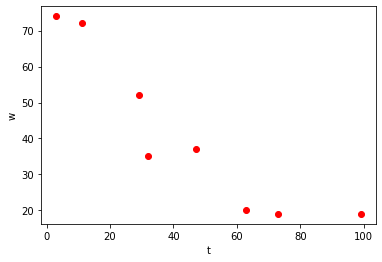

In [5]:
# This plots the points
plt.plot(t,w, 'ro')
plt.xlabel("t")
plt.ylabel("w")
plt.show()

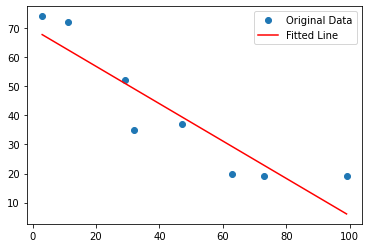

In [42]:
A = np.vstack([t, np.ones(len(t))]).T
m_line, c_line = np.linalg.lstsq(A,w, rcond=None)[0]

plt.plot(t,w, 'o', label='Original Data')
plt.plot(t, m_line * t + c_line, 'r', label = 'Fitted Line')
plt.legend()
plt.show()

In [47]:
np.linalg.lstsq(A,w, rcond=None)[1]

array([599.66643493])

In [35]:
A = np.vstack([t**2,t,np.ones(len(t))]).T
m1, m2, m3 = np.linalg.lstsq(A,w, rcond=None)[0]

In [36]:
m1, m2, m3

(0.008121177282633263, -1.4475442266554877, 81.94068683735087)

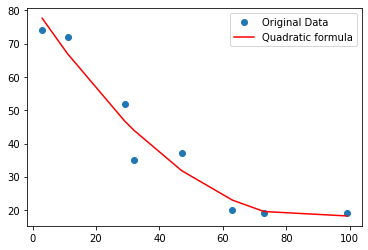

In [37]:
plt.plot(t,w, 'o', label='Original Data')
plt.plot(t, (m1 * t**2) + (m2* t) + m3, 'r', label = 'Quadratic formula')
plt.legend()
plt.show()

In [38]:
np.polyfit(t, w, 3)

array([ 4.10396441e-05,  1.85241585e-03, -1.20268581e+00,  8.01852511e+01])

In [39]:
A = np.vstack([t**3,t**2,t,np.ones(len(t))]).T
m1, m2, m3, m4 = np.linalg.lstsq(A,w, rcond=None)[0]

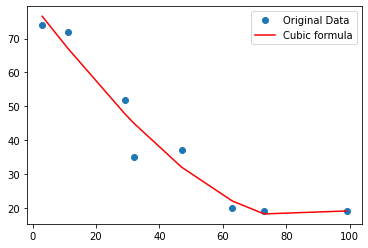

In [41]:
plt.plot(t,w, 'o', label='Original Data')
plt.plot(t, (m1*t**3)+(m2 * t**2) + (m3* t) + m4, 'r', label = 'Cubic formula')
plt.legend()
plt.show()

-----
# Exercise 2
We want to reconstruct a function $s(t)$ (also called the signal in this exercise), $t \in [0,1]$, from data given by
$$d(t) = \int_0^1 s(t) \, dt + \text{noise}.$$
We assume the data is given at $n$ equally space time points $t_j = j h$, $h = \frac{1}{n}$, $j=1,2, \ldots, n$. The data is therefore a vector $d = [d_1, \ldots, d_n]$, where $d_j$ denotes the value at $t_j$. 
The signal $s$ is to be reconstructed at time points 
$t_{j-1/2} = (j-1/2)h$ for $j = 1,2, \ldots, n$. It is described by a vector $s = [s_1, \ldots, s_n]$ with $s_j$ the value at $t_{j-1/2}$.
Numerical integration is described in Chapter 8 of the book by Heath. Using the composite midpoint rule, the vectors $s$ and $d$ are related by
$$d = A \cdot s + \text{noise}$$
where
$$A = \begin{bmatrix} 
h & 0 & 0 & \ldots & 0 \\
h & h & 0 & \ldots & 0 \\
h & h & h & \ddots &  \vdots \\
\vdots & \vdots & \ddots & \ddots & 0 \\
h & h & \ldots & h  & h 
\end{bmatrix}.$$


## (a)
As a test signal we take
$$s_{\rm true}(t) = \left\{
\begin{array}{ll} 1 & \text{if $|t-1/2|<0.15$}\\
0 & \text{otherwise} \end{array} 
\right. .$$ 
Generate data $d_0$ without noise and data $d_\epsilon$ with noise, where the noise is normally distributed, with mean zero and standard deviation $\epsilon = 0.005$.
Take for example $n=100$. Plot the data.

In [273]:
tj = []
n = 100

#j, t, 
for j in range(1, n + 1):
    tj.append(j*1/n)

In [274]:
# This generates s without noise
s_nonoise = []

for i in tj:
    if (abs(i - 0.5)) < 0.15:
        s_nonoise.append([1])
    else:
        s_nonoise.append([0])

In [275]:
s_noise = []

for i in s_nonoise:
    s_noise.append(np.array(i)+np.random.normal(0, 0.005))

In [276]:
A = np.full((n,n), 1/n)
A = np.tril(A)

d0 = np.matmul(A, s)
de = np.matmul(A, s_noise)

## (b)
Try to determine $s$ from $d_0$ by inverting the matrix $A$, ignoring the noise term.
Do the same with $d_\epsilon$ instead of $d_0$. Plot the results. What do you observe about the errors in the inversion?

In [278]:
d0_results = np.matmul(np.linalg.inv(A),d0)
de_results = np.matmul(np.linalg.inv(A),de)

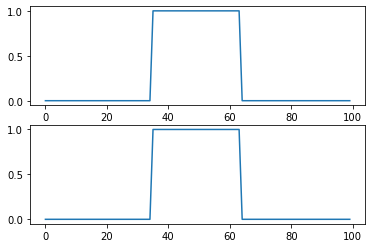

In [277]:
fig, axs = plt.subplots(2)
axs[0].plot(s_nonoise)
axs[1].plot(d0_results)
plt.show()


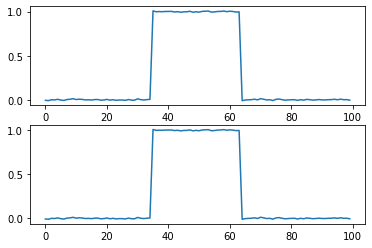

In [252]:
fig, axs = plt.subplots(2)
axs[0].plot(s_noise)
axs[1].plot(de_results)
plt.show()

## (c)
Create a function to solve the linear system $A s = d$ using the singular value decomposition (SVD) $A = U \Sigma V^T$ and run a test to verify that your function is correct. `numpy` and `scipy` contain functions to compute the SVD. These may be used.

Then plot the singular values of the matrix $A$ and explain the behavior found in (b) using the SVD.

In [327]:
# This factors A as an SVD
U, s, Vh = la.svd(A)

In [328]:
# Checks if A = SVD
m,n = 100, 100
sigma = np.zeros((m, n))

for i in range(min(m, n)):

    sigma[i, i] = s[i]

a1 = np.dot(U, np.dot(sigma, Vh))

np.allclose(A, a1)

True

In [336]:
def solve_svd(A,b):
    # compute svd of A
    U,s,Vh = la.svd(A)

    # U diag(s) Vh x = b <=> diag(s) Vh x = U.T b = c
    c = np.dot(U.T,b)
    # diag(s) Vh x = c <=> Vh x = diag(1/s) c = w (trivial inversion of a diagonal matrix)
    w = np.dot(np.diag(1/s),c)
    # Vh x = w <=> x = Vh.H w (where .H stands for hermitian = conjugate transpose)
    x = np.dot(Vh.conj().T,w)
    return x

In [340]:
x=solve_svd(A, d0)
x1=noise=solve_svd(A, de)

In [329]:
# This solves a linear system using svd
c = np.dot(U.T, d0)
w = np.dot(np.diag(1/s), c)
x = np.dot(Vh.conj().T, w)

In [332]:
# This solves a linear system using svd
c_noise = np.dot(U.T, de)
w_noise = np.dot(np.diag(1/s), c_noise)
x_noise = np.dot(Vh.conj().T, w_noise)

In [341]:
for i in range(len(x)):
    print(s_nonoise[i], x[i], s_noise[i], x1[i])

[0] 0.6398093836984178 [-0.01205744] [-0.01205744]
[0] 0.2132871622638028 [0.00301787] [0.00301787]
[0] 0.12799314215998114 [-0.0044204] [-0.0044204]
[0] 0.09144601305462131 [0.00347864] [0.00347864]
[0] 0.07114785356235362 [-0.00064836] [-0.00064836]
[0] 0.05823559584216334 [0.00309769] [0.00309769]
[0] 0.04930036902907951 [-0.00405534] [-0.00405534]
[0] 0.04275136792145034 [0.00091179] [0.00091179]
[0] 0.037746402595614105 [0.00327924] [0.00327924]
[0] 0.033797890370025244 [-0.00497194] [-0.00497194]
[0] 0.03060399521908136 [0.00072868] [0.00072868]
[0] 0.027967868362967885 [0.00448461] [0.00448461]
[0] 0.025755653375030028 [-0.00367108] [-0.00367108]
[0] 0.0238731556863191 [0.0050693] [0.0050693]
[0] 0.022252166088879415 [-0.00377143] [-0.00377143]
[0] 0.0208420783671952 [-0.01038837] [-0.01038837]
[0] 0.01960455506422745 [-0.00577427] [-0.00577427]
[0] 0.018510022128011668 [0.0023871] [0.0023871]
[0] 0.017535300430174865 [0.00104578] [0.00104578]
[0] 0.016661966048327353 [-0.004254

In [314]:
# Condition number of matrix A
sigma[0][0]/sigma[-1][-1]

127.94624708457609

[]

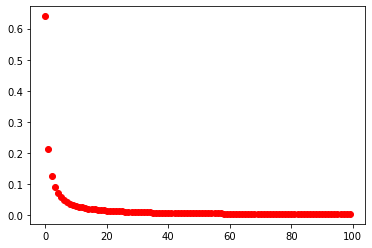

In [321]:
plt.plot(np.diagonal(sigma), 'ro')
plt.plot()

## (d)
When solving the system using the SVD, the matrix $\Sigma^{-1} = 
\operatorname{diag}(\sigma_1^{-1}, \ldots, \sigma_n^{-1})$ is used. 
To **regularize** the problem the matrix $\Sigma^{-1}$ can be replaced by a matrix 
$$T = \operatorname{diag}(\sigma_1^{-1} , \ldots, \sigma_k^{-1}, 0, \ldots 0 ),$$
where $\sigma_j^{-1}$ is replaced by $0$ if $\sigma_j$ is smaller than a threshold $\alpha$. 

Implement a function `TruncatedSVDSolve(A, b, alpha)` that performs this procedure. 
Find a value of $\alpha$ such that the test signal $s$ is reconstructed reasonably well from the noisy data. Plot the result.

Explain that in the presence of noise, the result of `TruncatedSVDSolve(A, b, alpha)` can be more accurate than exact inversion.

In [ ]:
# YOUR CODE HERE